<a href="https://colab.research.google.com/github/taeyoonnoh/Kaggle-Competition/blob/main/Porto_Seguro%E2%80%99s_Safe_Driver_Prediction/My_Trial_Porto_Seguro%E2%80%99s_Safe_Driver_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! pip install -q kaggle

# from google.colab import files

# files.upload()

# ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle/

# ! chmod 600 ~/.kaggle/kaggle.json


In [2]:
# !kaggle competitions download -c porto-seguro-safe-driver-prediction

In [3]:
# !unzip sample_submission.csv.zip
# !unzip test.csv.zip
# !unzip train.csv.zip

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [5]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [6]:
# null 값 없음
train.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [7]:
# 다 int 아니면 float
train.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [8]:
# shape
train.shape

(595212, 59)

In [9]:
# 0 이 압도적으로 많음!
train['target'].value_counts(normalize=True)

0    0.963552
1    0.036448
Name: target, dtype: float64

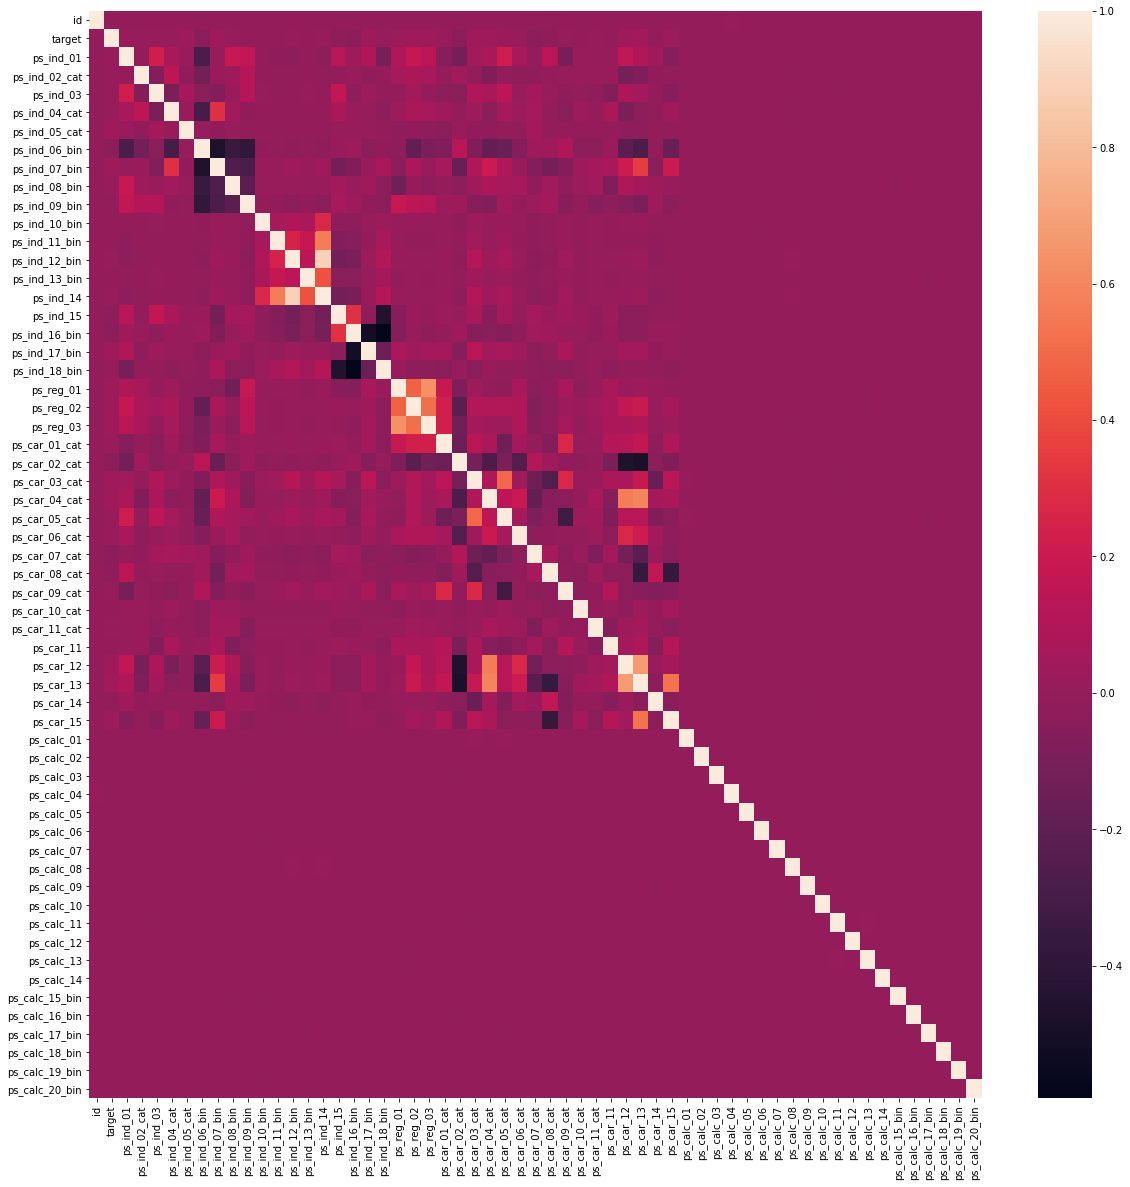

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr())

# Modeling
* normal
* Upsampling
* Downsampling

In [15]:
from sklearn.model_selection import train_test_split
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import f1_score,accuracy_score

from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [17]:
X = train.copy()
X = X.drop(['id','target'],axis=1)
y = train['target']
X.shape,y.shape

((595212, 57), (595212,))

In [18]:
# Upsampling with SMOTE

sm = SMOTE(random_state=42)

X,y = sm.fit_resample(X,y)

len(X),len(y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1147036, 1147036)

In [19]:
# train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=0.30)
X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test,stratify=y_test,random_state=42,test_size=1/3)

X_train.shape,X_validation.shape,X_test.shape

((802925, 57), (229407, 57), (114704, 57))

In [20]:
classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=42),
    # "KNearest": KNeighborsClassifier(),
    # "Support Vector Classifier": SVC(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier" : RandomForestClassifier(random_state=42),
    "XGBoost Classifier" : XGBClassifier(random_state=42),
    'LGBM CLassifier' : LGBMClassifier(random_state=42)
}

for key,classifier in classifiers.items() : 
    classifier.fit(X_train,y_train)
    y_validation_pred = classifier.predict(X_validation)
    f1 = f1_score(y_true = y_validation,y_pred=y_validation_pred)
    accuracy = accuracy_score(y_true=y_validation,y_pred=y_validation_pred)
    print(f'{key}')
    print(f'Accuracy : {accuracy}')
    print(f'F1 : {f1}')
    print('-----------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisiticRegression
Accuracy : 0.5871050142323468
F1 : 0.5800201297348108
-----------------------
DecisionTreeClassifier
Accuracy : 0.95644858265005
F1 : 0.9567322474892924
-----------------------
RandomForestClassifier
Accuracy : 0.98121243030945
F1 : 0.9808527841206941
-----------------------
XGBoost Classifier
Accuracy : 0.9790023844084967
F1 : 0.9785519326414027
-----------------------
LGBM CLassifier
Accuracy : 0.9812167893743434
F1 : 0.9808571415878488
-----------------------


In [21]:
best_model = LGBMClassifier(random_state=42)
best_model.fit(X_train,y_train)
y_test_pred = classifier.predict(X_test)
f1 = f1_score(y_true = y_test,y_pred=y_test_pred)
accuracy = accuracy_score(y_true=y_test,y_pred=y_test_pred)
print(f'F1 : {f1}')
print(f'Accuracy : {accuracy}')

F1 : 0.9809976458046462
Accuracy : 0.9813520016738736


In [32]:
new_test = test.copy()
new_test = new_test.drop(['id'],axis=1)

predictions = best_model.predict_proba(new_test)[:,1]

In [33]:
submission_df = pd.read_csv('sample_submission.csv')
submission_df['target'] = predictions

In [35]:
submission_df.to_csv('submission.csv',index=False)

In [36]:
!kaggle competitions submit -c porto-seguro-safe-driver-prediction -f submission.csv -m "2021-08-19 Upsampling+LGBMC+Normal"

100% 23.5M/23.5M [00:06<00:00, 4.05MB/s]
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 64, in main
    print(out, end='')
UnicodeEncodeError: 'latin-1' codec can't encode character u'\u2019' in position 38: ordinal not in range(256)


In [42]:
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import cross_val_score

In [43]:
def compute_score(clf, X, y, scoring):
    xval = cross_val_score(clf, X, y, cv = StratifiedKFold(n_splits=5,random_state=42,shuffle=True), scoring=scoring)
    return np.mean(xval)

In [40]:
X = train.copy()
X = X.drop(['id','target'],axis=1)
y = train['target']
X.shape,y.shape

((595212, 57), (595212,))

In [41]:
# Upsampling with SMOTE

sm = SMOTE(random_state=42)

X,y = sm.fit_resample(X,y)

len(X),len(y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1147036, 1147036)

In [46]:
# Cross Validation

classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=42),
    # "KNearest": KNeighborsClassifier(),
    # "Support Vector Classifier": SVC(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    # "RandomForestClassifier" : RandomForestClassifier(random_state=42),
    "XGBoost Classifier" : XGBClassifier(random_state=42),
    'LGBM CLassifier' : LGBMClassifier(random_state=42)
}

for key,classifier in classifiers.items() : 
    f1 = compute_score(clf=classifier, X=X, y=y, scoring='f1')
    accuracy = compute_score(clf=classifier, X=X, y=y, scoring='accuracy')
    print(f'{key}')
    print(f'Accuracy : {accuracy}')
    print(f'F1 : {f1}')
    print('-----------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisiticRegression
Accuracy : 0.5867287512496141
F1 : 0.5769219654242497
-----------------------
DecisionTreeClassifier
Accuracy : 0.956130408877557
F1 : 0.9564395963495096
-----------------------
XGBoost Classifier
Accuracy : 0.979916933347161
F1 : 0.9795051935167066
-----------------------
LGBM CLassifier
Accuracy : 0.9810633665020594
F1 : 0.980697944689827
-----------------------


In [47]:
best_model = LGBMClassifier(random_state=42)
best_model.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
new_test = test.copy()
new_test = new_test.drop(['id'],axis=1)

predictions = best_model.predict_proba(new_test)[:,1]

In [49]:
submission_df = pd.read_csv('sample_submission.csv')
submission_df['target'] = predictions
submission_df.to_csv('submission.csv',index=False)

In [50]:
!kaggle competitions submit -c porto-seguro-safe-driver-prediction -f submission.csv -m "2021-08-19 second commit Upsampling+LGBMC+Normal+CV"

100% 23.5M/23.5M [00:13<00:00, 1.87MB/s]
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 64, in main
    print(out, end='')
UnicodeEncodeError: 'latin-1' codec can't encode character u'\u2019' in position 38: ordinal not in range(256)
